# LAXPC Tutorial Notebook

# import python modules

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sc

# Reading event file, gti file,response file

We need following files for this tutorial: 
1) A LAXPC events file without bary correction.
2) An event file with bary correction.
3) A gti file (which contains the good time start and stop time values).
4) A response file.
The files can be open in the same format as described in the example below.

In [2]:
fevents=fits.open("C:\\Users\\ASUS\\Documents\\winter_school_DB\\ObsID406_02741_event.fits")
fevents_bary=fits.open("C://Users//ASUS//Documents//winter_school_DB//ObsID406_02741_laxpc_bary.fits")
fgti=fits.open('C:\\Users\\ASUS\\Documents\\hea_tutorial\\ObsID406_02741_laxpc1_bary.gti')
fresponse=fits.open('C:\\Users\\ASUS\\Documents\\hea_tutorial\\lx10_17aug16.rmf')

# Some information about fits file

From the files we can obtain informations like the length, header etc.

In [3]:
#len(fevents_bary)
#fevents_bary[1].header

# Change in time after bary correction

Observe the time difference between the data from the event file and bary correction file.

In [5]:
time=fevents[1].data['TIME']
time_bary=fevents_bary[1].data['TIME']

# create an array of time differences betweeen time and barycentre time


# plot the time difference array

73.24125623703003

# Lightcurve without GTI

Plot the light curve without applying gti cuts. This plot will consist of both gti(good time interval) data as well as bti (bad time interval) data. We can compare the two light curves obtained before and after applying gti cuts.

Text(0,0.5,'$counts\\ s^{-1}$')

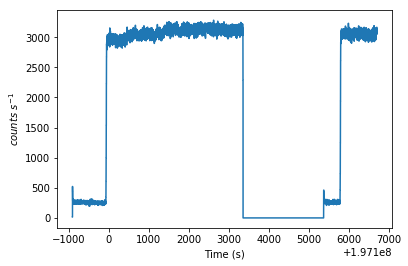

In [6]:
# Define timebins
binsize = 1
tbins = np.arange(time_bary.min(), time_bary.max(), binsize)

# Make histogoram


# Plot


# applying GTI

Read and filter event file to keep in array only events within the good time interval.

In [7]:
gtidata=fgti[1].data
t_start=gtidata[0][0],gtidata[1][0]
t_stop=gtidata[0][1],gtidata[1][1]
t_start, t_stop

((197099975.0, 197105810.0), (197103300.0, 197106645.0))

## Here we compare the lengtht of the event file and the gti file.

In [8]:
eventsdata=fevents_bary[1].data

# choose one of the GTI intervals; keep event data only for that interval


(13614384, 2550273)

#  lightcurve after applying GTI

Here we plot the light curve only taking time values falling in the gti range. We can compare this plot with the plot before applying gti cuts.

Text(0,0.5,'$counts\\ s^{-1}$')

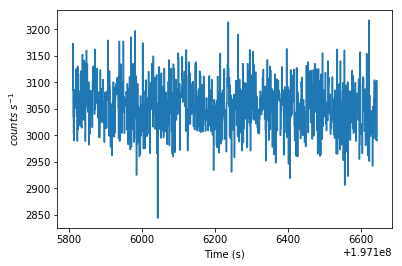

In [9]:
# Define timebins
binsize = 1

# Make histogoram

# Plot


# Calculating Phase and folding

1) From filtered events calculate the phase array using the expression and constants provided.
2) Create the histogram of array.
3) Obtain the pulse profile.
We can see that the pulse profile matches with that of Crab Nebula.

Text(0,0.5,'norm ')

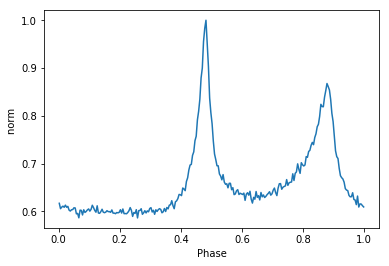

In [11]:
tref=fevents_bary[1].header['MJDREFI']
tref=tref*86400
time_current =time_gti + tref
T0=57480.5635028439*86400 # Reference Epoch for which nu is known
t_phase=time_current-T0

# freq and its derivatives
nu,nudot,nuddot = 29.6553306828504,-3.69261197216621e-10,-3.9353064617231e-20

#calculating phase
phi=t_phase*(nu+0.5*t_phase*(nudot+t_phase*nuddot/3.0))

# keep only the fractional part of the phase

# if phase value is negative then fold it back by adding 1

#folding phase: make phase histogram
no_bins=256

# normalise the histogram: divide by the maximum counts in a bin

# plot the normalised histogram: the pulse profile


# Making energy spectrum

1) Bin in energy (You can play around with binsize).
2) Show apparent spectrum in log scale.
3) Plot log Nvs log E.

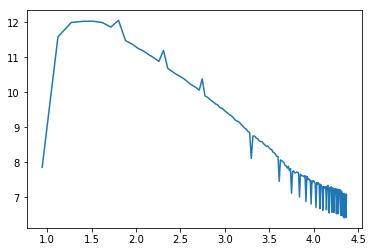

In [12]:
for i in range(len(t_start)) :
    energy_gti = eventsdata['Energy'][np.where((time_bary>=t_start[i]) & (time_bary<=t_stop[i]) & (eventsdata['Energy']<=80))]

#energy_gti, len(energy_gti)
binsize = 0.5 #change as required
ebins = np.arange(energy_gti.min(), energy_gti.max(), binsize)
counts_energy, ebin_edges =np.histogram(energy_gti,bins=ebins)
ebin_edges = (ebin_edges[1:] + ebin_edges[:-1])/2
log_counts=np.log(counts_energy)
log_ebins=np.log(ebin_edges)
plt.plot(log_ebins, log_counts)

# Making PHA spectrum

1) Bin in channel.
2) Show apparent spectrum in log scale.
3) Plot log N vs log 'channel'

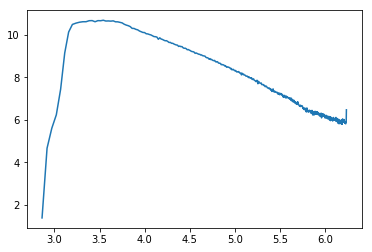

In [13]:
for i in range(len(t_start)) :
    channel_gti = eventsdata['Channel'][np.where((time_bary>=t_start[i]) & (time_bary<=t_stop[i]) & (eventsdata['Channel']<=512) )]

binsize = 1 # change as required
cbins = np.arange(channel_gti.min(), channel_gti.max(), binsize)

# make channel histogram


# plot log counts vs log channel number



# Making contour plots for response matrix

1) Read in response file.
2) Make 2D plot/ contour for the MATRIX.

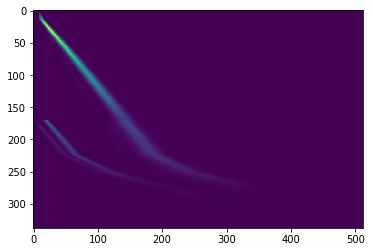

In [14]:
resp_data = fresponse[2].data
mat = np.zeros((len(resp_data), len(resp_data[0]['matrix'])))
for i in range(338): mat[i,:] = resp_data[i]['matrix']

# plotting contour and 2d-array of response matrix 
plt.imshow(mat)

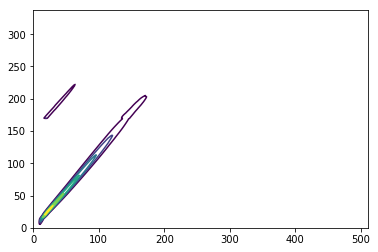

In [15]:
plt.contour(mat)

In [ ]:
# create a simulated spectrum array: 
# energy values are the average of ENERG_LO and ENERG_HI for each energy bin specified in the rmf file
# spec(Ebin) = 1.e5*[energy(Ebin)]**{-2.0}

# Create a SimPHA array: 512 channels
# SimPHA(Pbin) = sum_over_Ebin{spec(Ebin)*mat(Pbin,Ebin)}

# Bin the observed PHA data by a factor of 2: sum consecutive channels

# compare SimPHA (first 256 channels) with binned observed PHA (256 channels)
